# Titanic disaster using Logistic Regression

In [1]:
#import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

## Load the data

In [3]:
# Load data

In [4]:
titanic_data=pd.read_csv("C:/Users/HP/OneDrive/Desktop/STUDIES/titanic.csv")
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## View the data using head function which returns top rows

In [5]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
titanic_data.index

RangeIndex(start=0, stop=887, step=1)

In [7]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [9]:
titanic_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Explaning Dataset

# Data analysis

#### Import seaborn for visually analysing the data
#### Find out how many survived vs died using countplot method of seaborn

In [10]:
# countplot for survived vs non survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

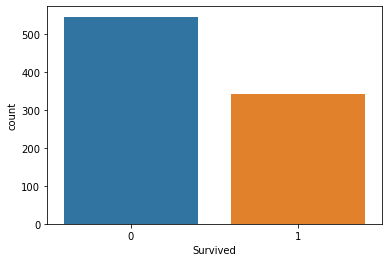

In [11]:
sns.countplot(x="Survived",data= titanic_data)

In [12]:
# male vs female survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

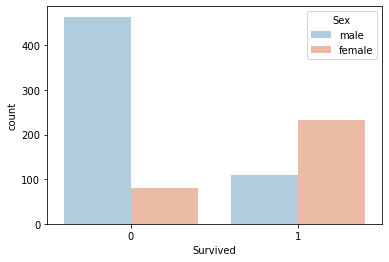

In [13]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex',palette='RdBu_r')

In [14]:
# To know how many passengers are there in each class

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    487
1    216
2    184
Name: Pclass, dtype: int64

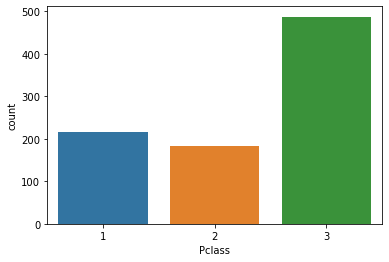

In [15]:
sns.countplot(titanic_data["Pclass"])
titanic_data['Pclass'].value_counts() 

In [16]:
# To know how many survived and died in each class

<AxesSubplot:xlabel='Survived', ylabel='count'>

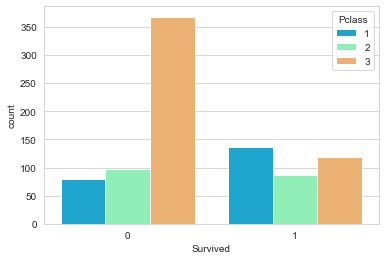

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='rainbow')

In [18]:
#Check how many values are null

In [19]:
titanic_data.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [20]:
#Visualize null values using heat map

<AxesSubplot:>

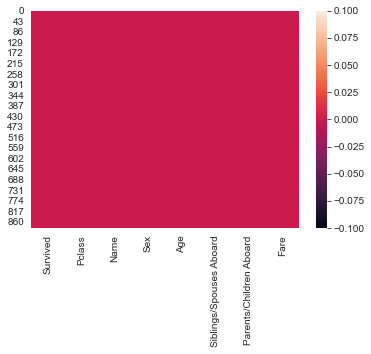

In [21]:
sns.heatmap(titanic_data.isna())

In [22]:
# There are no null values in the given dataset

In [23]:
#  Age distribution of a variable against the density distribution

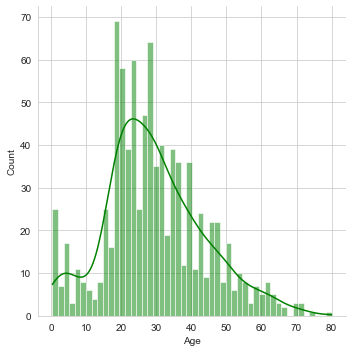

In [24]:
sns.displot(titanic_data['Age'].dropna(),kde=True,color='green',bins=50)

In [25]:
#To know skewness of age

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.44718857190799916
0.2925590867837582


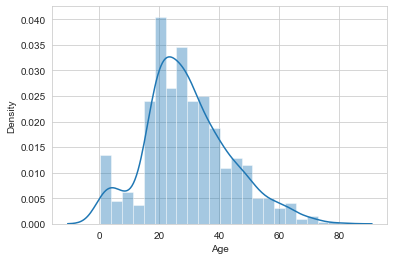

In [26]:
sns.distplot(titanic_data["Age"])
print(titanic_data["Age"].skew())
print(titanic_data["Age"].kurt())

In [27]:
#Boxplot for P-class and age to know distribution

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

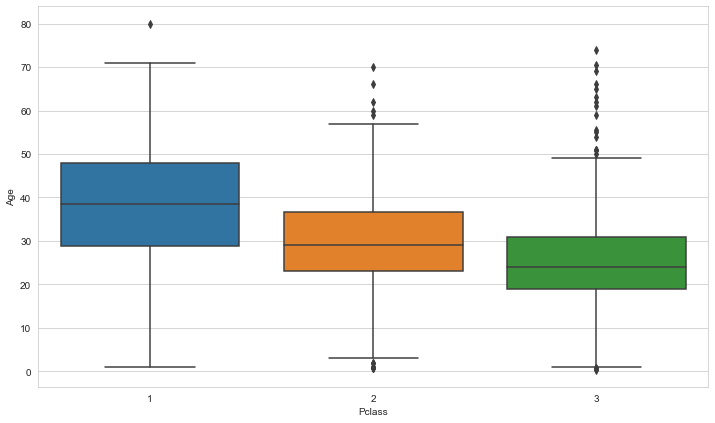

In [28]:
plt.figure(figsize=(12,7)),
sns.boxplot(x=titanic_data['Pclass'], y=titanic_data['Age'])

In [29]:
#function that finds outliers

def outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) #to find if sample has 2 or more outliers
    
    return multiple_outliers

In [30]:
#detect outliers

In [31]:
titanic_data.loc[outliers(titanic_data,["Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare"])]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
741,0,1,Capt. Edward Gifford Crosby,male,70.0,1,1,71.00
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.00
87,1,1,Miss. Mabel Helen Fortune,female,23.0,3,2,263.00
158,0,3,Master. Thomas Henry Sage,male,5.0,8,2,69.55
179,0,3,Miss. Constance Gladys Sage,female,8.0,8,2,69.55
200,0,3,Mr. Frederick Sage,male,17.0,8,2,69.55
322,0,3,Mr. George John Jr Sage,male,20.0,8,2,69.55
339,1,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.00
788,0,3,Miss. Stella Anna Sage,female,21.0,8,2,69.55
842,0,3,Mr. Douglas Bullen Sage,male,18.0,8,2,69.55


In [32]:
# drop outliers

In [33]:
titanic_data = titanic_data.drop(outliers(titanic_data,["Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare"]),axis = 0).reset_index(drop = True)

In [34]:
titanic_data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

##### We can see, Name, Sex,  are non-numerical.It seems Name is not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values**

In [35]:
#convert sex column to numerical values

In [36]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender']=gender

In [37]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1


In [38]:
titanic_data.drop(['Name','Sex'], axis = 1)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
871,0,2,27.0,0,0,13.0000,1
872,1,1,19.0,0,0,30.0000,0
873,0,3,7.0,1,2,23.4500,0
874,1,1,26.0,0,0,30.0000,1


In [39]:
#Seperate Dependent and Independent variables

In [40]:
x=titanic_data[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare','Gender']]
y=titanic_data['Survived']

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
871    0
872    1
873    0
874    1
875    0
Name: Survived, Length: 876, dtype: int64

# Data Modelling
#### Building Model using Logestic Regression
#### Build the model

In [42]:
#import train test split method

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#train test split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.21, random_state=42)

In [46]:
#import Logistic  Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
#Fit  Logistic Regression 

In [49]:
lr=LogisticRegression()

In [50]:
lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
#predict

In [52]:
predict=lr.predict(x_test)

# Testing
##### See how our model is performing


In [53]:
#print confusion matrix 

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,predict)*100

78.80434782608695

In [57]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,99,17
Actual Yes,22,46


In [58]:
#import classification report

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       116
           1       0.73      0.68      0.70        68

    accuracy                           0.79       184
   macro avg       0.77      0.76      0.77       184
weighted avg       0.79      0.79      0.79       184



#### Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or by using other model

### Note:
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall.